In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import timeit

In [2]:
# -m -- флаг, показывающий обращение к памяти
@nb.njit('(float64[:,:],float64[:,:], float64[:,:], int64, int64, int64)')
def matsum(A, B, C, N, M, K):
    for n in range(N): 
        for m in range(M):
            s = 0
            for k in range(K):
                s += A[n,k]*B[k,m] 
            C[n, m] = s

In [4]:
N_max = 1  # не общий разер матриц
K_max = 100000000  # общай размер матриц
A = np.random.random((N_max, K_max))
B = np.random.random((K_max, N_max))
C = np.empty_like(A)

In [7]:
def timeWithSlice(n, N, M, K):
    return timeit.timeit(stmt = "matsum(A[:, :%(n)s], B[:%(n)s, :], C, %(N)s, %(M)s, %(K)s)" % {'n': n, 'N': N, 'M': M, 'K': K},
                         globals = {'matsum': matsum, 'A': A, 'B': B, 'C': C},
                           number = 20)

In [8]:
def timeNoSlice(k, N, M, K):
    return timeit.timeit(stmt="matsum(a, b, C, %(N)s, %(M)s, %(K)s)"%{'N': N, 'M': M, 'K': K}, globals={"matsum": matsum, "a": A[:, :k], "b": B[:k,:], "C": C}, 
                         number=100)

In [9]:
g = np.logspace(3, 8, num=100, dtype=int)

#sliceTimeList = list(timeWithSlice(k, 100, 100, k) for k in g)
noSliceTimeList = list(timeNoSlice(k, 1, 1, k) for k in g)

ks = list(g)

In [12]:
#coefWith = np.polyfit(ks, sliceTimeList, 1)
coefNo = np.polyfit(ks, noSliceTimeList, 1, w=g[::-1])

#lineWith = np.poly1d(coefWith)
lineNo = np.poly1d(coefNo)

#print(coefWith)
print('a=%.2e, \t (b + h)=%.2e'%tuple(coefNo))

a=1.08e-07, 	 (b + h)=1.79e-04


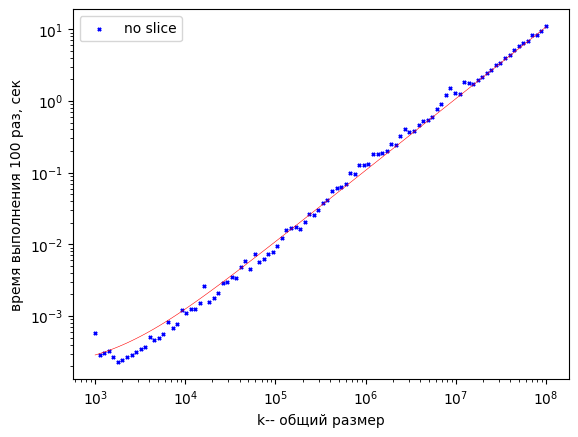

In [16]:
#plt.scatter(ks, sliceTimeList, marker='x', s=5, c='r', label='with slace')
plt.scatter(ks, noSliceTimeList, marker='x', s=5, c='b', label='no slice')
#plt.plot(ks, lineWith(ks), color='r', linewidth=0.4)
plt.plot(g, lineNo(g), color='r', linewidth=0.4)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('k-- общий размер')
plt.ylabel('время выполнения %s раз, сек'%100)
plt.legend()